In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE, SMOTENC

import warnings

warnings.filterwarnings('ignore')

In [5]:
train_df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/kaggle_competitions/Introvert&Extrovert/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/kaggle_competitions/Introvert&Extrovert/test.csv')

In [6]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
print(train_df.shape)
print(test_df.shape)

(18524, 9)
(6175, 8)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [9]:
train_df['Personality'].value_counts()

,count
Personality,
Extrovert,13699
Introvert,4825


In [10]:
train_df.isnull().sum()/len(train_df)*100

,0
id,0.000000
Time_spent_Alone,6.424098
Stage_fear,10.219175
Social_event_attendance,6.370114
Going_outside,7.914057
Drained_after_socializing,6.202764
Friends_circle_size,5.689916
Post_frequency,6.823580
Personality,0.000000


In [11]:
train_df.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [12]:
train_df = train_df.drop('id',axis = 1)
test_idx = test_df['id']
test_df = test_df.drop('id',axis = 1)

In [13]:

def impute(df):

  for col in df.columns:
    if df[col].dtypes == 'object':
      imputer_cat = SimpleImputer(strategy = 'most_frequent')
      df[[col]] = imputer_cat.fit_transform(df[[col]])
    elif df[col].dtypes == np.number:
      imputer_num = SimpleImputer(strategy = 'median')
      df[[col]] = imputer_num.fit_transform(df[[col]])
  return df


In [14]:
impute(train_df)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,No,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,5.0,Introvert
18522,2.0,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [15]:
x_train = train_df.iloc[:,:-1]
y_train = train_df['Personality']

In [16]:
# Numerical & Categorical cols
num_cols = x_train.select_dtypes(include =[ np.number]).columns.to_list()
cat_cols = x_train.select_dtypes(include = ['O']).columns.to_list()

print(num_cols)
print(cat_cols)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
['Stage_fear', 'Drained_after_socializing']


In [17]:
y_train.shape


(18524,)

In [18]:
encoder = OneHotEncoder(sparse_output = False,  dtype = 'int',drop= 'first',handle_unknown = 'ignore')
x_train_encoded = encoder.fit_transform(x_train[cat_cols])
x_train_df = pd.DataFrame(x_train_encoded, columns = encoder.get_feature_names_out())
x_train_df = pd.concat([x_train.drop(cat_cols, axis = 1), x_train_df], axis = 1)
x_test_encoded = encoder.transform(test_df[cat_cols])
x_test_df = pd.DataFrame(x_test_encoded, columns = encoder.get_feature_names_out())
x_test_df = pd.concat([test_df.drop(cat_cols, axis = 1), x_test_df], axis = 1)

In [19]:
x_train_df.columns = x_train_df.columns.str.replace('_Yes','', regex= True)
x_train_df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing
0,0.0,6.0,4.0,15.0,5.0,0,0
1,1.0,7.0,3.0,10.0,8.0,0,0
2,6.0,1.0,0.0,3.0,0.0,1,0
3,3.0,7.0,3.0,11.0,5.0,0,0
4,1.0,4.0,4.0,13.0,5.0,0,0


In [20]:
x_test_df.columns = x_test_df.columns.str.replace('_Yes','',regex = True)
x_test_df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing
0,3.0,7.0,4.0,6.0,NaN,0,0
1,NaN,0.0,0.0,5.0,1.0,1,1
2,3.0,5.0,6.0,15.0,9.0,0,0
3,3.0,4.0,4.0,5.0,6.0,0,0
4,9.0,1.0,2.0,1.0,1.0,1,1


In [21]:
# balancing the target class
# Get the indices of categorical columns in x_train
cat_feature_indices = [x_train.columns.get_loc(col) for col in cat_cols if col in x_train.columns]

smote = SMOTE(random_state = 42)
x_train_smote,y_train_smote = smote.fit_resample(x_train_df,y_train)
x_train_smote = pd.DataFrame(x_train_smote, columns=x_train_df.columns)
print(y_train_smote.value_counts())

Personality
Extrovert    13699
Introvert    13699
Name: count, dtype: int64


In [22]:
x_test_df.columns = x_train_df.columns

In [23]:
y_train_smote = y_train_smote.apply(lambda x: 0 if x== 'Introvert' else 1 if x == 'Extrovert' else None)
y_train_smote

,Personality
0,1
1,1
2,0
3,1
4,1
...,...
27393,0
27394,0
27395,0
27396,0


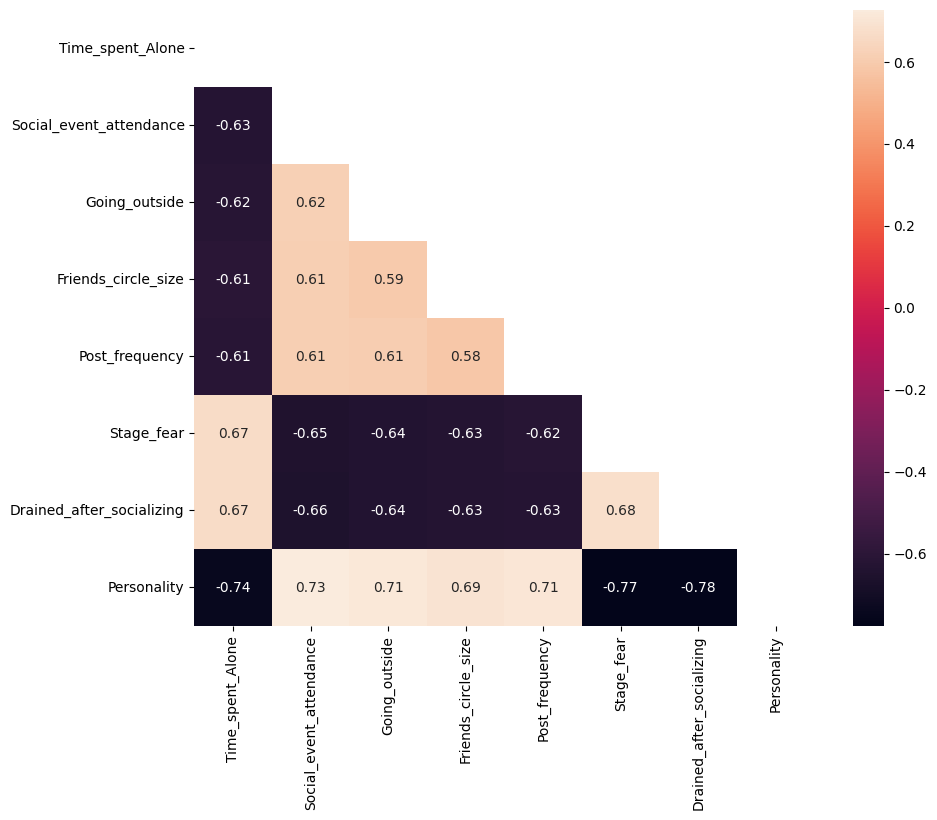

In [24]:
comb = pd.concat([x_train_smote,y_train_smote],axis = 1)
plt.figure(figsize = (10,8))
sns.heatmap(comb.corr(), mask = np.triu(comb.corr()), annot = True)
plt.show()

In [25]:
# Model building
model = DecisionTreeClassifier(random_state = 42)

Accuracy:  99.57 %
Classification Report:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13699
           1       1.00      0.99      1.00     13699

    accuracy                           1.00     27398
   macro avg       1.00      1.00      1.00     27398
weighted avg       1.00      1.00      1.00     27398



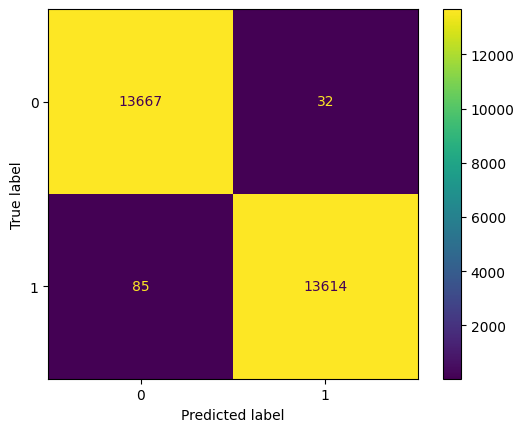

In [26]:
model.fit(x_train_smote, y_train_smote)
y_pred = model.predict(x_train_smote)
print('Accuracy: ',round(accuracy_score(y_train_smote,y_pred)*100,2),'%')
print('Classification Report:\n\n',classification_report(y_train_smote,y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_train_smote,y_pred)
print(cm)

In [27]:
y_pred_test = model.predict(x_test_df)
final_df = pd.DataFrame()
final_df.index = test_idx
final_df['Personality'] = ['Introvert' if x == 0 else 'Extrovert' for x in y_pred_test]

In [28]:
final_df.head()

,Personality
id,
18524,Extrovert
18525,Introvert
18526,Extrovert
18527,Extrovert
18528,Introvert


In [29]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/kaggle_competitions/Introvert&Extrovert/submission_asad.csv')

Accuracy:  99.57 %
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     13699
           1       0.99      1.00      1.00     13699

    accuracy                           1.00     27398
   macro avg       1.00      1.00      1.00     27398
weighted avg       1.00      1.00      1.00     27398



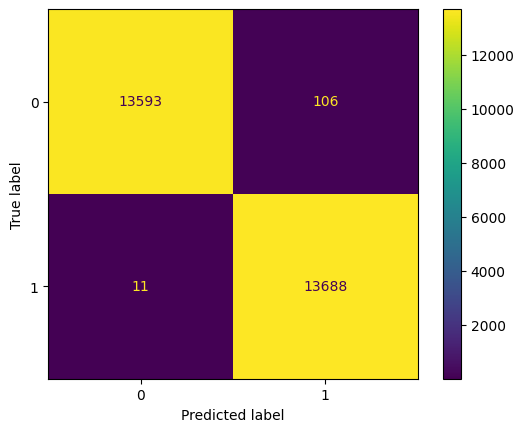

In [30]:
model_rf = RandomForestClassifier(random_state =42, n_estimators=200, n_jobs = -1)

model_rf.fit(x_train_smote, y_train_smote)
y_pred = model_rf.predict(x_train_smote)
print('Accuracy: ',round(accuracy_score(y_train_smote,y_pred)*100,2),'%')
print('Classification Report:\n\n',classification_report(y_train_smote,y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_train_smote,y_pred)
print(cm)

In [31]:
y_pred_test_rf = model_rf.predict(x_test_df)
final_df2 = pd.DataFrame()
final_df2.index = test_idx
final_df2['Personality'] = ['Introvert' if x == 0 else 'Extrovert' for x in y_pred_test_rf]

In [32]:
final_df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/kaggle_competitions/Introvert&Extrovert/submission_asad2.csv')

Accuracy:  95.79 %
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.94      0.96     13699
           1       0.94      0.98      0.96     13699

    accuracy                           0.96     27398
   macro avg       0.96      0.96      0.96     27398
weighted avg       0.96      0.96      0.96     27398



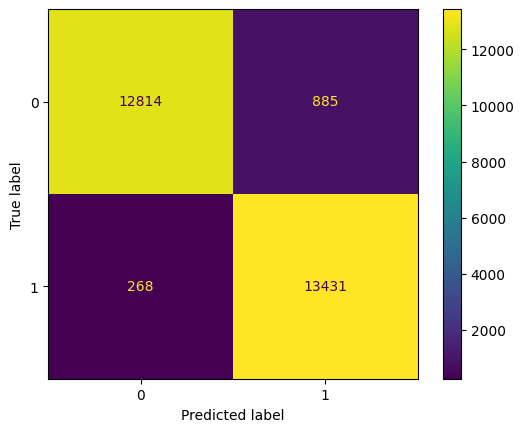

In [33]:
model_lr =LogisticRegression()

model_lr.fit(x_train_smote, y_train_smote)
y_pred = model_lr.predict(x_train_smote)
print('Accuracy: ',round(accuracy_score(y_train_smote,y_pred)*100,2),'%')
print('Classification Report:\n\n',classification_report(y_train_smote,y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_train_smote,y_pred)
print(cm)

In [34]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator = RandomForestClassifier(), param_grid =
    {'n_estimators':(50,100,150,200),
     "criterion":('gini','entropy','log_loss'),
     'max_features':('sqrt','log2',None),
     'bootstrap':(True,False),
     'oob_score':(True,False)},
                     n_jobs=-1, cv = 5
)
model.fit(x_train_smote, y_train_smote)
best_params = model.best_params_
print(best_params)

{'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 200, 'oob_score': False}


Accuracy:  99.57 %
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     13699
           1       0.99      1.00      1.00     13699

    accuracy                           1.00     27398
   macro avg       1.00      1.00      1.00     27398
weighted avg       1.00      1.00      1.00     27398



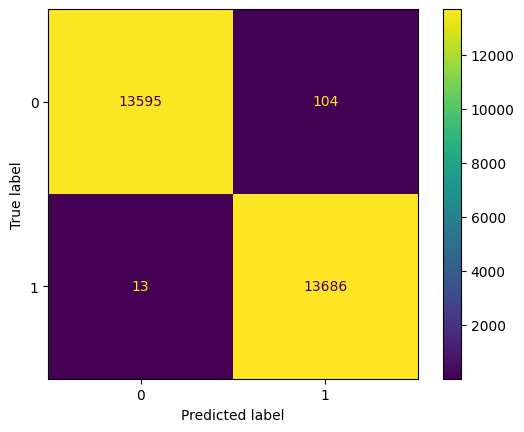

In [35]:
model_rf = RandomForestClassifier(**best_params, n_jobs =-1, random_state = 42)
model_rf.fit(x_train_smote,y_train_smote)
y_pred = model_rf.predict(x_train_smote)
print('Accuracy: ',round(accuracy_score(y_train_smote,y_pred)*100,2),'%')
print('Classification Report:\n\n',classification_report(y_train_smote,y_pred))
cm = ConfusionMatrixDisplay.from_predictions(y_train_smote,y_pred)
print(cm)

In [37]:
y_pred_test_rf2 = model_rf.predict(x_test_df)
final_df2 = pd.DataFrame()
final_df2.index = test_idx
final_df2['Personality'] = ['Introvert' if x == 0 else 'Extrovert' for x in y_pred_test_rf2]

In [38]:
final_df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/kaggle_competitions/Introvert&Extrovert/submission_asad3.csv')